# Load data

In [2]:
import numpy as np

In [3]:
X_train=np.load('../../Data/Protoplanetary_disk_problem/X_train.npy')
X_test=np.load('../../Data/Protoplanetary_disk_problem/X_test.npy')
y_train=np.load('../../Data/Protoplanetary_disk_problem/y_train.npy')
y_test=np.load('../../Data/Protoplanetary_disk_problem/y_test.npy')

In [4]:
position=np.load('../../Data/Protoplanetary_disk_problem/position.npy')

# Scaling

In [5]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
scaler_y = StandardScaler()
scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)

### Create the Random Forest and train it with the training data set.

```n_estimators``` is the number of trees to train.

```criterion``` defines the loss function, can be mse or mae,

```n_jobs``` defines the number of processors to use, setting it to -1 will use the maximum available

```max_features``` defines the subset of features (selected randomly) that the trees will look at to make the split

```min_impurity_decrease``` is the minimum reduction in variance required for a branch to split. 

In [8]:

import sklearn as sk
from sklearn import ensemble

In [9]:
N_trees = 100

model = sk.ensemble.RandomForestRegressor(n_estimators=N_trees, criterion='mse', n_jobs=-1, 
                                          max_features=11, min_impurity_decrease=0.01)

model.fit(X_train, y_train)

RandomForestRegressor(max_features=11, min_impurity_decrease=0.01, n_jobs=-1)

# Predict new stuff and scaling it back

In [10]:
y_true=scaler_y.inverse_transform(y_test)
y_predict=scaler_y.inverse_transform(model.predict(X_test))
y_true_train=scaler_y.inverse_transform(y_train)
y_predict_train=scaler_y.inverse_transform(model.predict(X_train))


# Images

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (9, 6)
SMALL_SIZE = 15
MEDIUM_SIZE = 20
BIGGER_SIZE = 25
colormap={0:'red',1:'green'}
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [12]:
def plot_sed(n,data=y_train):
    plt.figure(figsize=(9,6))
    plt.scatter(position,data[n],marker='+')
    plt.xscale('log')
    plt.grid()
    plt.title(f'Model {n} of {len(data)}')
    plt.xlabel(r'$ \lambda \, [\mu m]$')
    plt.ylabel(r'$ log(\nu F_\nu) [erg/cm^2/s]$')
    plt.show()

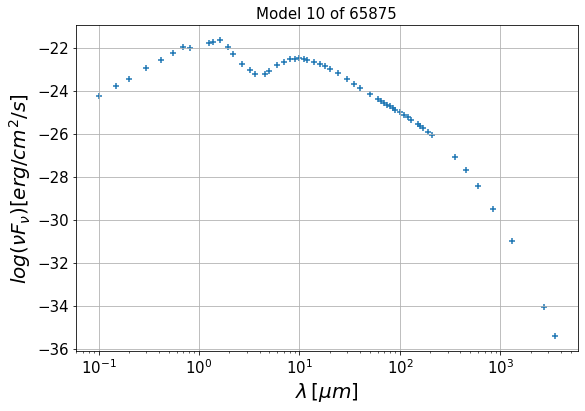

In [13]:
plot_sed(10,data=y_true)

In [14]:
def compare_prediction_true(n,true_data=y_true,predicted_data=y_predict):
    plt.figure(figsize=(9,6))
    plt.scatter(position,true_data[n],marker='+',label='True')
    plt.scatter(position,predicted_data[n],marker='+',label='Predicted')
    plt.xscale('log')
    plt.grid()
    plt.legend()
    plt.title(f'Model {n} of {len(true_data)}')
    plt.xlabel(r'$ \lambda \, [\mu m]$')
    plt.ylabel(r'$ log(\nu F_\nu) [erg/cm^2/s]$')
    plt.show()

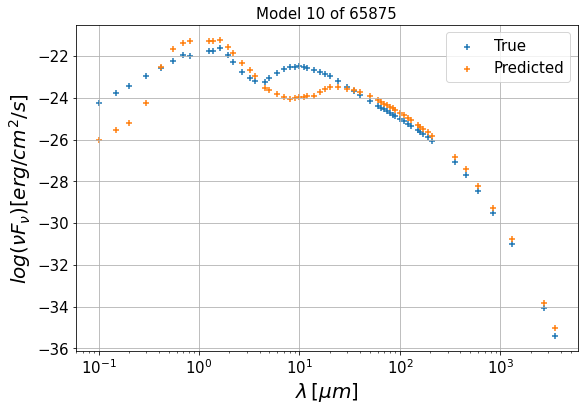

In [15]:
compare_prediction_true(10,true_data=y_true,predicted_data=y_predict)